In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('E:/Python Projects/shohreh/Shohreh_GitHub_Repository/NISTARPA-E Database/Git Repo/1. Zeolite-CO2 Data/Data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11304 entries, 0 to 11303
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adsorbent                 11304 non-null  object 
 1   adsorbates                11304 non-null  object 
 2   temperature(k)            11304 non-null  int64  
 3   pressure                  11304 non-null  float64
 4   pressureUnits             11304 non-null  object 
 5   total_adsorption          11304 non-null  float64
 6   adsorptionUnits           11304 non-null  object 
 7   DOI                       11304 non-null  object 
 8   pore diameter (A)         11107 non-null  float64
 9   micro pore volume (ml/g)  11107 non-null  float64
 10  BET surface area (m2/g)   11107 non-null  float64
 11  Cation                    11107 non-null  object 
 12  Si/Al ratio               11049 non-null  float64
 13  Company of adsorbent      8562 non-null   object 
 14  shape 

In [3]:
#### second try
masks= {
    'cm3(STP)/g' : df['adsorptionUnits']== 'cm3(STP)/g',
    'mmol/kg' : df['adsorptionUnits']== 'mmol/kg',
    'mol/g' : df['adsorptionUnits']== 'mol/g'
}

df.loc[masks['cm3(STP)/g'], 'total_adsorption'] = df.loc[masks['cm3(STP)/g'], 'total_adsorption']
df.loc[masks['mmol/kg'], 'total_adsorption'] = (df.loc[masks['mmol/kg'], 'total_adsorption'] / 1000).round(9)
df.loc[masks['mol/g'], 'total_adsorption'] = (df.loc[masks['mol/g'], 'total_adsorption'] * 1000).round(3)
df.loc[masks['cm3(STP)/g'] | masks['mmol/kg'] | masks['mol/g'], 'adsorptionUnits'] = 'mmol/g'

In [4]:
df= df[df['adsorptionUnits'] == 'mmol/g']

In [5]:
df['adsorptionUnits'].value_counts()

adsorptionUnits
mmol/g    10766
Name: count, dtype: int64

In [10]:
df.columns

Index(['adsorbent', 'adsorbates', 'temperature(k)', 'pressure',
       'pressureUnits', 'total_adsorption', 'adsorptionUnits', 'DOI',
       'pore diameter (A)', 'micro pore volume (ml/g)',
       'BET surface area (m2/g)', 'Cation', 'Si/Al ratio',
       'Company of adsorbent', 'shape'],
      dtype='object')

# remove useless columns

In [6]:
df.drop(columns= ['adsorbates', 'pressureUnits', 'adsorptionUnits', 'DOI', 'pore diameter (A)', 'micro pore volume (ml/g)', 'BET surface area (m2/g)', 'Si/Al ratio','Company of adsorbent', 'shape'], inplace= True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10766 entries, 0 to 11303
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   adsorbent         10766 non-null  object 
 1   temperature(k)    10766 non-null  int64  
 2   pressure          10766 non-null  float64
 3   total_adsorption  10766 non-null  float64
 4   Cation            10628 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 504.7+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

le =LabelEncoder()

df['adsorbent'] = le.fit_transform(df['adsorbent'])
adsorbent_labels = le.classes_

df['Cation'] = le.fit_transform(df['Cation'])
cation_labels = le.classes_

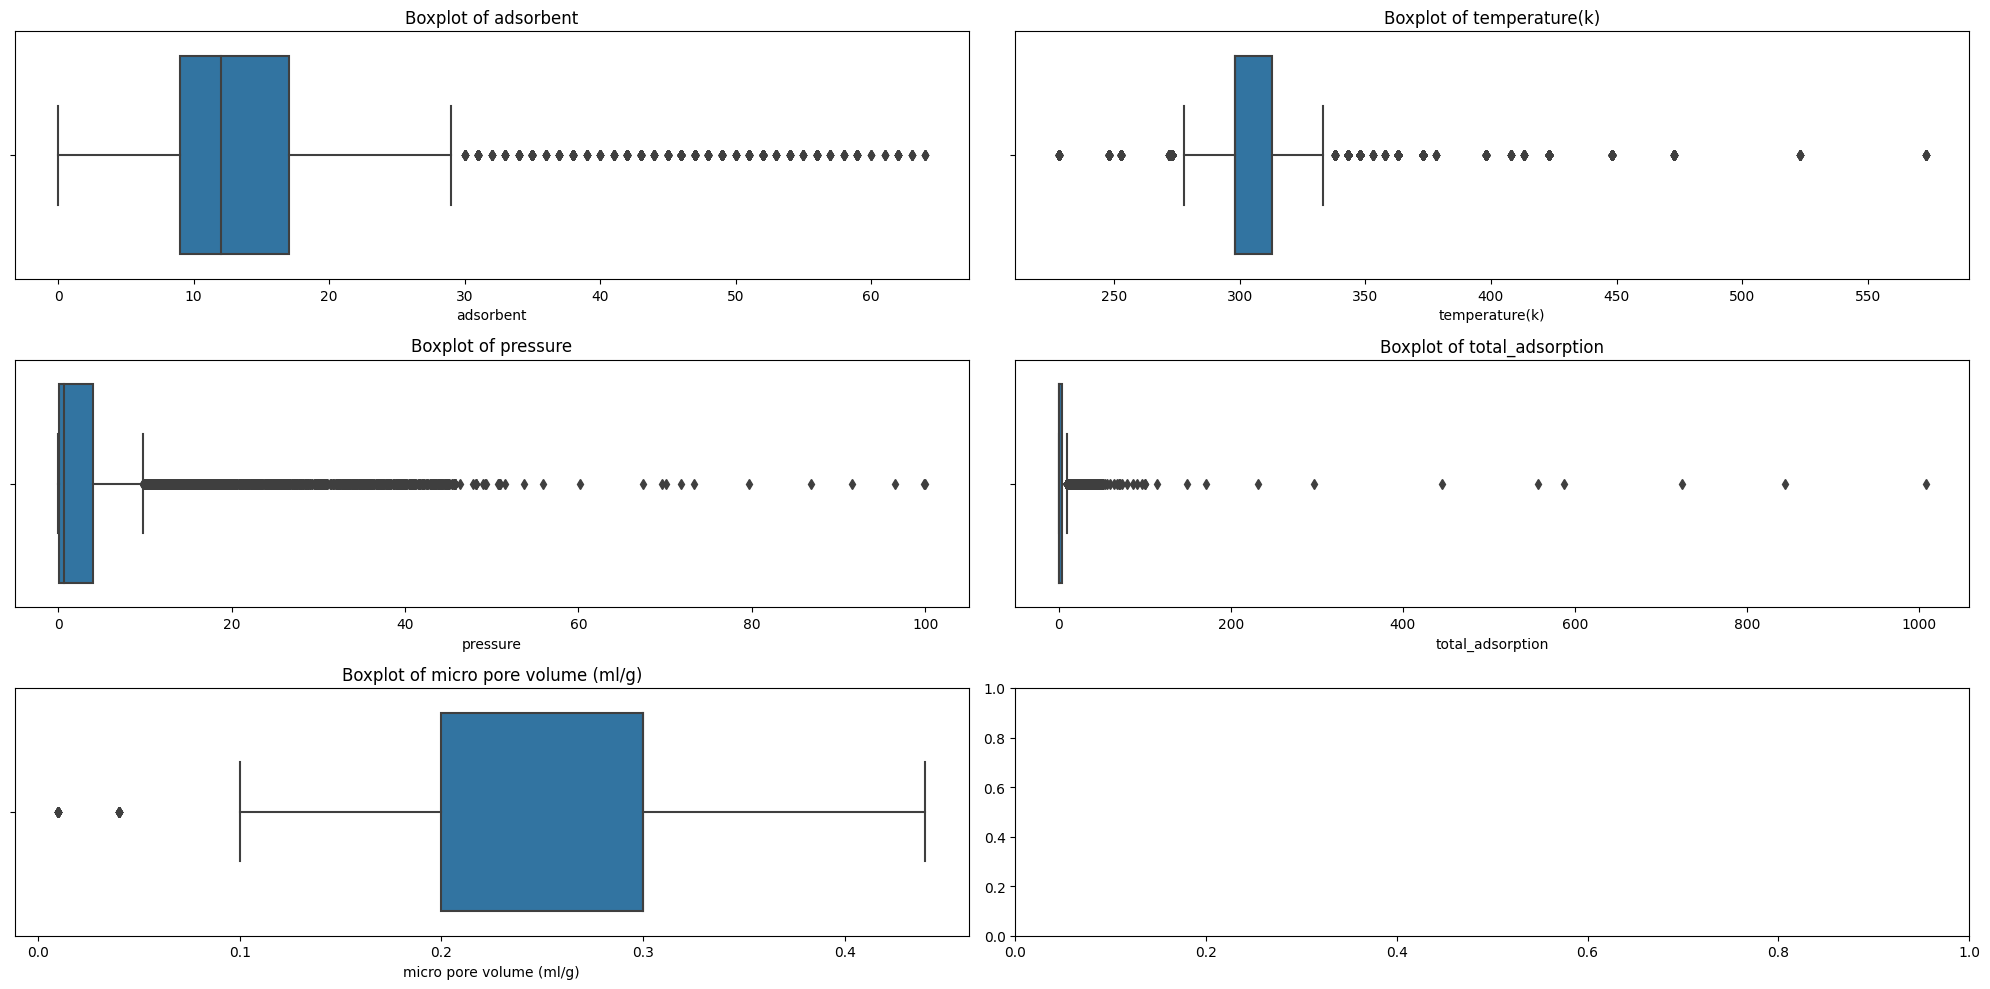

In [14]:
ncols=2
nrows= 3
fig, axes= plt.subplots(nrows, ncols, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x= col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

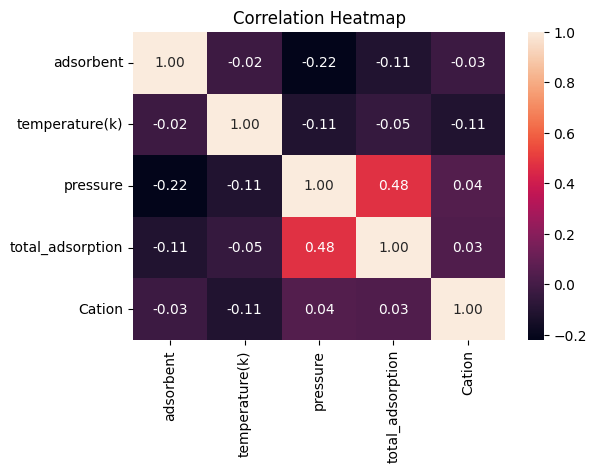

In [9]:
# plt.figure(figsize= (6,4))
# sns.heatmap(df_std.corr(), fmt='.2f', annot= True)
# plt.title('Correlation Heatmap')
# plt.show()

plt.figure(figsize= (6,4))
sns.heatmap(df.corr(), fmt='.2f', annot= True)
plt.title('Correlation Heatmap')
plt.show()


In [50]:
df_std.head()

,adsorbent,temperature(k),pressure,total_adsorption,pore diameter (A),micro pore volume (ml/g),BET surface area (m2/g),Cation,Si/Al ratio
0,0.59322,0.441176,0.002389,1.479008e-08,0.088,0.441963,0.474664,0.375,0.023103
1,0.59322,0.441176,0.005200,3.218812e-08,0.088,0.441963,0.474664,0.375,0.023103
2,0.59322,0.441176,0.012249,7.582193e-08,0.088,0.441963,0.474664,0.375,0.023103
3,0.59322,0.441176,0.028478,1.762856e-07,0.088,0.441963,0.474664,0.375,0.023103
4,0.59322,0.441176,0.068297,4.227708e-07,0.088,0.441963,0.474664,0.375,0.023103


In [51]:
from sklearn.model_selection import train_test_split

X = df_std.drop(['total_adsorption'], axis=1)
y = df_std['total_adsorption']
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .8, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
estimators = {
    'LinearRegression' : LinearRegression(),
    'SVR' : SVR(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor()
}
for estimator_name, estimator_object in estimators.items():
    estimator_object.fit(X_train, y_train)
    y_pred = estimator_object.predict(X_test)
    print(f"{estimator_name}\tr2_score: {r2_score(y_test, y_pred)}\tmse: {mean_squared_error(y_test, y_pred)}")

LinearRegression	r2_score: 8.262431498040623e-05	mse: 0.0005045275195140414
SVR	r2_score: -17.08485471126828	mse: 0.009125060840149083
DecisionTreeRegressor	r2_score: -3.0862331339864824e-05	mse: 0.0005045847813814299
RandomForestRegressor	r2_score: 0.14893178807721152	mse: 0.00042942281466455364
GradientBoostingRegressor	r2_score: 0.1523886924059683	mse: 0.0004276785671811151
AdaBoostRegressor	r2_score: -0.0003074191180776342	mse: 0.0005047243234206128


In [193]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
print(f"SVR\tr2_score: {r2_score(y_test, y_pred)}\tmse: {mean_squared_error(y_test, y_pred)}")

SVR	r2_score: 0.8948000407378234	mse: 0.0044864462534037605


# predict new data with model

In [218]:
# Load new data
df_test = pd.read_excel('E:/Python Projects/shohreh/Shohreh_GitHub_Repository/NISTARPA-E Database/Adsorption project/Data - Copy.xlsx')
# clean and fit new data with model entry
df_test.dropna(subset= ['pore diameter (A)', 'micro pore volume (ml/g)', 'BET surface area (m2/g)', 'Cation', 'Si/Al ratio', 'Company of adsorbent', 'shape'], how='all', inplace= True)
df_test.drop(columns= ['adsorbates', 'pressureUnits', 'adsorptionUnits', 'DOI', 'Company of adsorbent', 'shape'], inplace= True, axis=1)
# adsorbent and cation label
for i in range(len(adsorbent_labels)):
    for j in range(len(df_test['adsorbent'].values)):
        if adsorbent_labels[i] == df_test['adsorbent'].values[j]:
            df_test['adsorbent'].values[j] = i
for i in range(len(cation_labels)):
    for j in range(len(df_test['Cation'].values)):
        if cation_labels[i] == df_test['Cation'].values[j]:
            df_test['Cation'].values[j] = i

df_test_std = pd.DataFrame(scaler.transform(df_test), columns= df_test.columns)

df_test_std.head()

,adsorbent,temperature(k),pressure,total_adsorption,pore diameter (A),micro pore volume (ml/g),BET surface area (m2/g),Cation,Si/Al ratio
0,0.7,0.655172,0.000388,0.000388,0.354839,0.555556,0.212598,0.0,0.0
1,0.7,0.655172,0.000284,0.000284,0.354839,0.555556,0.212598,0.0,0.0
2,0.7,0.655172,0.000378,0.000378,0.354839,0.555556,0.212598,0.0,0.0
3,0.7,0.655172,0.000424,0.000424,0.354839,0.555556,0.212598,0.0,0.0
4,0.7,0.655172,0.000469,0.000469,0.354839,0.555556,0.212598,0.0,0.0


In [219]:
X_new = df_test_std.drop(['total_adsorption'], axis=1)
y_new = df_test_std['total_adsorption']
y_new_pred= svr_model.predict(X_new)
print(f"SVR\tr2_score: {r2_score(y_new, y_new_pred)}\tmse: {mean_squared_error(y_new, y_new_pred)}")

SVR	r2_score: -1498.4506923798222	mse: 0.016931956955164824
